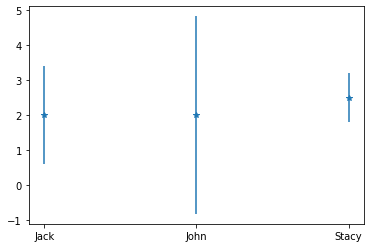

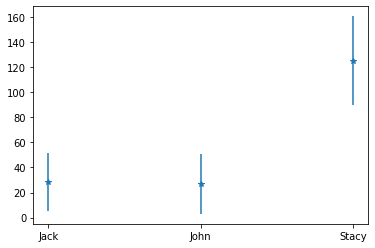

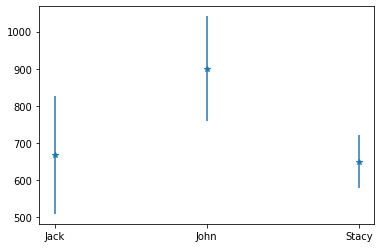

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Stuff for Jess
#Make a fake data frame to work with
df = {
    'name': ["John", "Stacy", "John", "Stacy", "Jack", "Jack"], 
    'error1': [0, 3, 4, 2, 1, 3],
    'error2': [10, 100, 44, 150, 45, 12],
    'error3': [1000, 600, 800, 700, 556, 781]
}
#Keep track of the number of error columns
numErrCols = 3
#Convert to panda frame
dataErrors = pd.DataFrame(df)
#split data into mean and std column
meanColumns = dataErrors.groupby(['name']).mean().reset_index()
stdColumns = dataErrors.groupby(['name']).std().reset_index()
#Merge back together and rename
finalFrame = pd.merge(meanColumns, stdColumns, on='name')

finalFrame.columns = ['names'] + ['mean ' + str(s) for s in range(1, numErrCols+1)] + ['std ' + str(s) for s in range(1, numErrCols+1)]
finalFrame

for i in range(0,numErrCols):
    #Plot the data
    plt.errorbar(finalFrame.loc[:,'names'], finalFrame.iloc[:,i+1], finalFrame.iloc[:,i+numErrCols+1], linestyle='None', marker='*')
    plt.show()